In [ ]:
!pip install pycaret[full]
!pip install mlxtend

import pycaret
pycaret.__version__

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 54.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.datasets import get_data
from mlxtend.frequent_patterns import apriori, association_rules


In [ ]:
get_data('index')

data=get_data('credit')
print(data.head())

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1      90000    2          2         2   34      0      0      0      0   
2      50000    2          2         1   37      0      0      0      0   
3      50000    1          2         1   57     -1      0     -1      0   
4      50000    1          1         2   37      0      0      0      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
2      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
3      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   
4      0  ...    19394.0    19619.0    20024.0    2500.0    1815.0     657.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
0       0.0       0.0    

In [ ]:
data['SEX'] = data['SEX'].astype(str)
data['EDUCATION'] = data['EDUCATION'].astype(str)
data['MARRIAGE'] = data['MARRIAGE'].astype(str)
data['default'] = pd.to_numeric(data['default'], errors='coerce')

In [ ]:
data['default'] = pd.to_numeric(data['default'], errors='coerce')

transactions = data.groupby(['SEX', 'EDUCATION', 'MARRIAGE'])['default'].sum().unstack().reset_index().fillna(0).set_index('SEX')
transactions = transactions.applymap(pd.to_numeric, errors='coerce')  # Convert to numeric

transactions = transactions.applymap(lambda x: 1 if x > 0 else 0)


In [ ]:

frequent_itemsets = apriori(transactions, min_support=0.05, use_colnames=True)
association_rules_ = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

print("Frequent Itemsets:")
print(frequent_itemsets.head())
print(association_rules_.head())

Frequent Itemsets:
    support     itemsets
0  0.857143  (EDUCATION)
1  0.214286          (0)
2  0.857143          (1)
3  0.714286          (2)
4  0.428571          (3)
  antecedents consequents  antecedent support  consequent support   support  \
0         (2)         (0)            0.714286            0.214286  0.214286   
1         (0)         (2)            0.214286            0.714286  0.214286   
2         (3)         (0)            0.428571            0.214286  0.214286   
3         (0)         (3)            0.214286            0.428571  0.214286   
4         (2)         (3)            0.714286            0.428571  0.428571   

   confidence      lift  leverage  conviction  zhangs_metric  
0         0.3  1.400000  0.061224    1.122449       1.000000  
1         1.0  1.400000  0.061224         inf       0.363636  
2         0.5  2.333333  0.122449    1.571429       1.000000  
3         1.0  2.333333  0.122449         inf       0.727273  
4         0.6  1.400000  0.122449    1.42

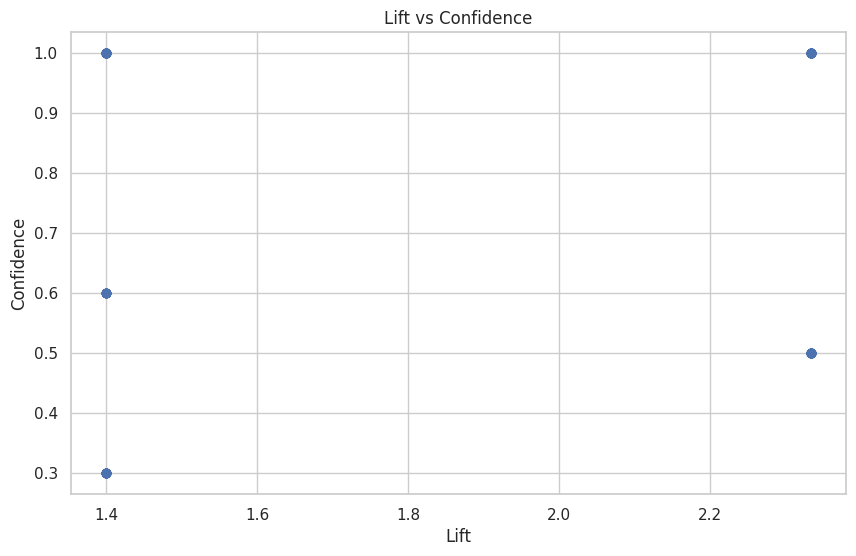

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(association_rules_['lift'], association_rules_['confidence'])
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')
plt.show()


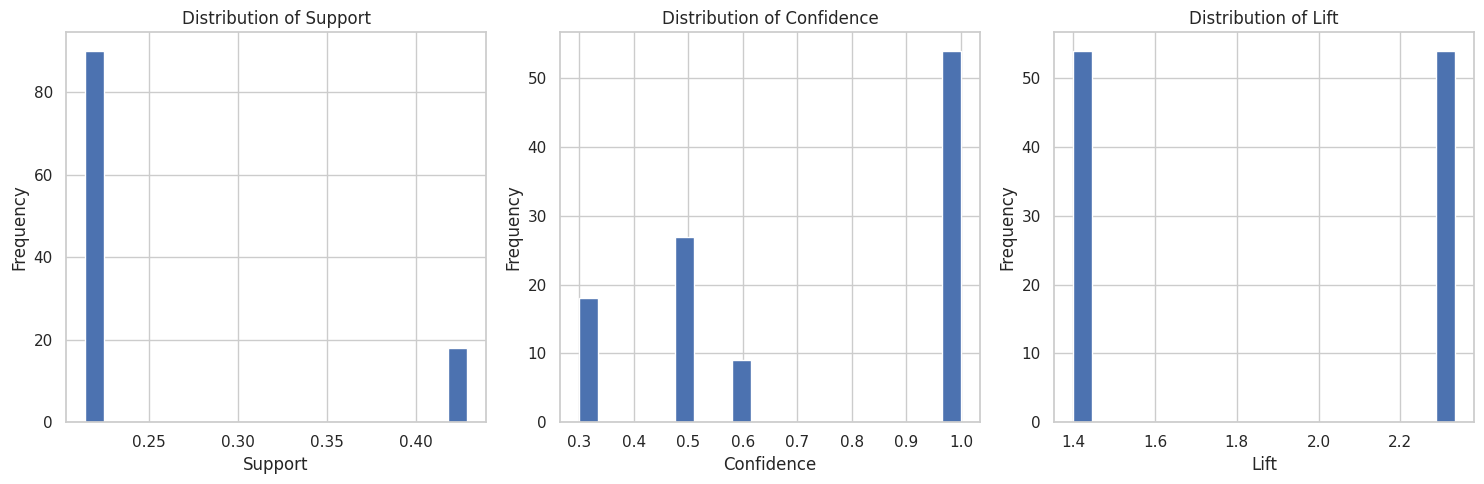

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(association_rules_['support'], bins=20)
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.title('Distribution of Support')

plt.subplot(1, 3, 2)
plt.hist(association_rules_['confidence'], bins=20)
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.title('Distribution of Confidence')

plt.subplot(1, 3, 3)
plt.hist(association_rules_['lift'], bins=20)
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.title('Distribution of Lift')

plt.tight_layout()
plt.show()
